In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import fetch_olivetti_faces
warnings.filterwarnings('ignore')

data = fetch_olivetti_faces()

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1, random_state = 42)
temp_id, test_id = next(split.split(data.data, data.target))

In [3]:
x, y = data.data[temp_id], data.target[temp_id]
x_test, y_test = data.data[test_id], data.target[test_id]

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.15, random_state = 42)
train_id, valid_id = next(split.split(x, y))
x_train, y_train = x[train_id], y[train_id]
x_valid, y_valid = x[valid_id], y[valid_id]

In [4]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_train_pca, x_valid_pca, x_test_pca = pca.fit_transform(x_train), pca.transform(x_valid), pca.transform(x_test)

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_k = [KMeans(n_clusters = k, random_state = 42, n_init = "auto").fit(x_train_pca) for k in range(1, 200)]
inertias = [kmean.inertia_ for kmean in kmeans_k]

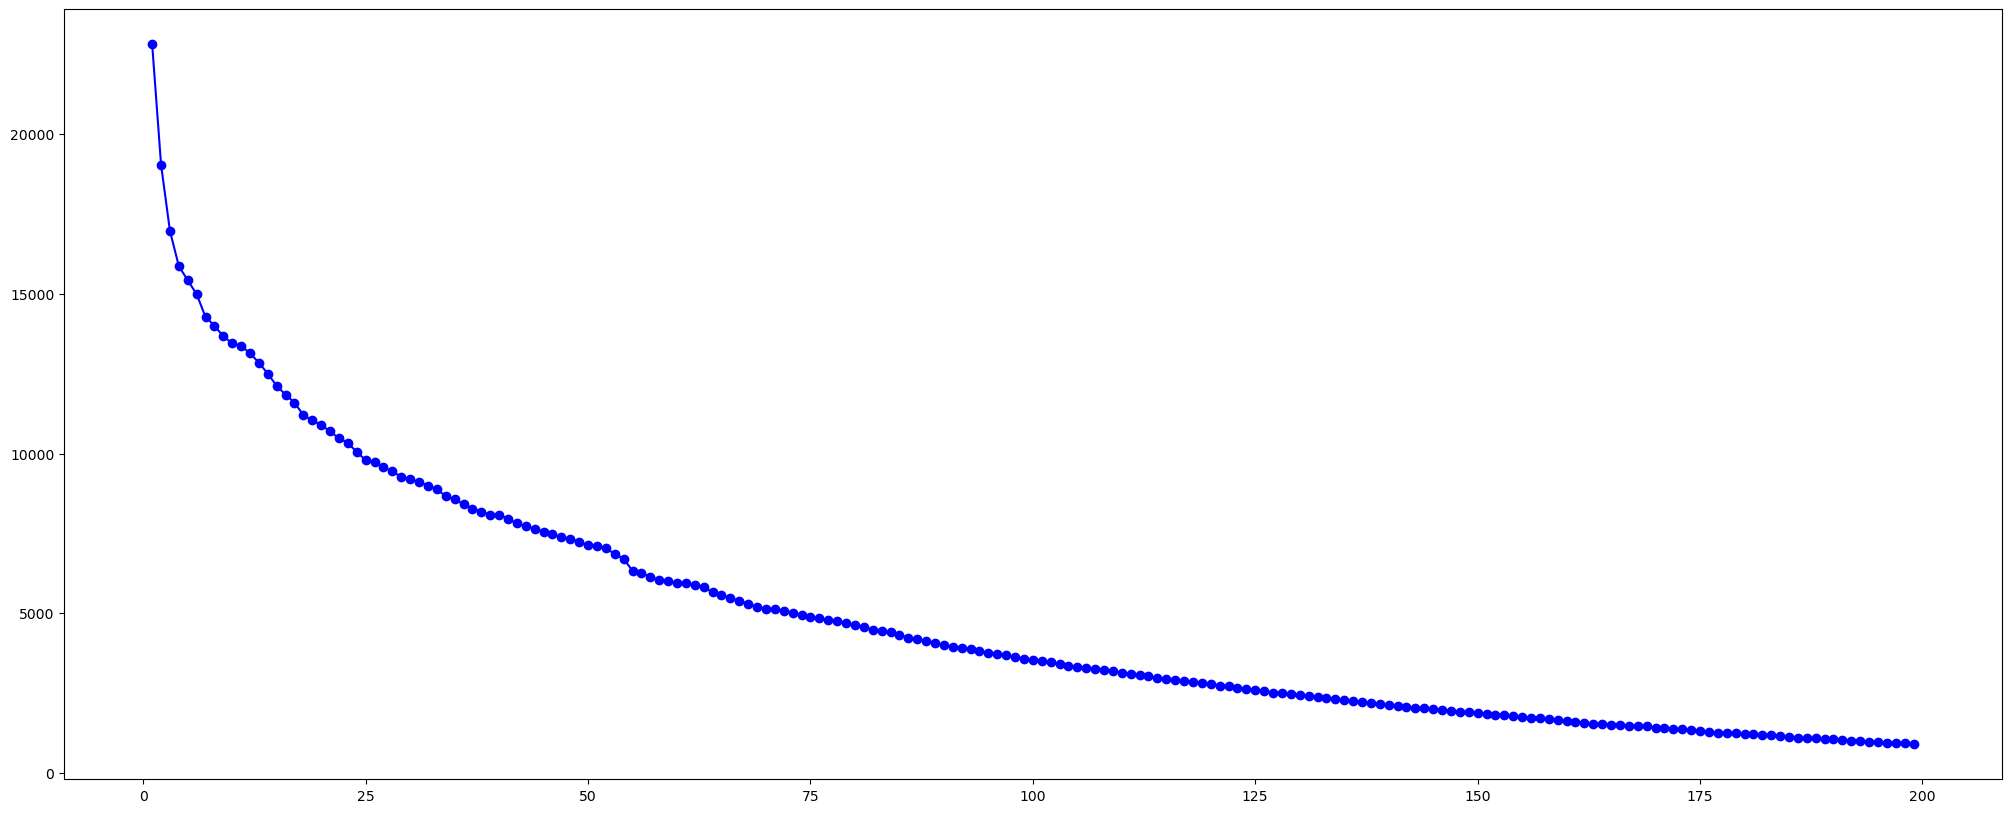

In [6]:
plt.figure(figsize = (25, 10))
plt.plot(range(1, 200), inertias, "bo-")

In [7]:
silhouette_scores = [silhouette_score(x_train, cluster.labels_) for cluster in kmeans_k[1:]]

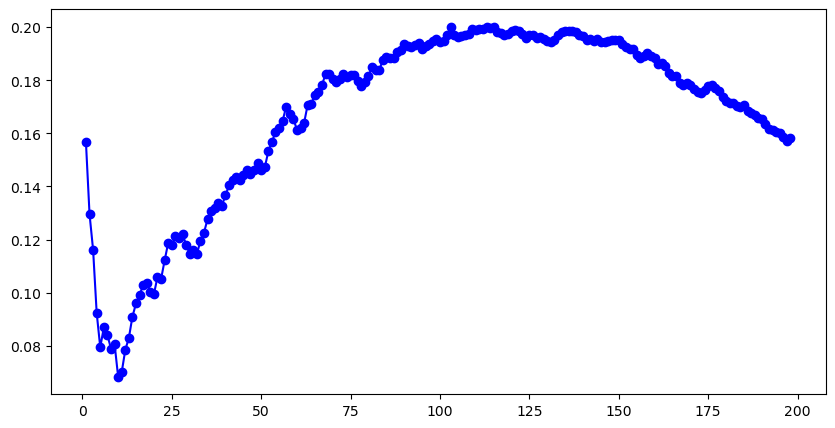

In [8]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 199), silhouette_scores, "bo-")
best = np.argmax(silhouette_scores)

In [9]:
best_model = kmeans_k[best]

Cluster 0


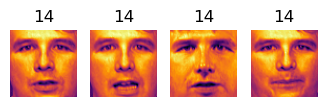

Cluster 1


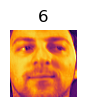

Cluster 2


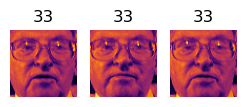

Cluster 3


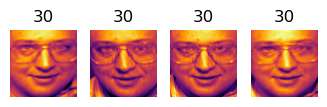

Cluster 4


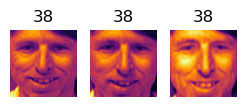

Cluster 5


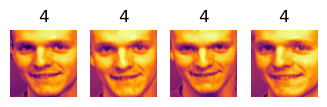

Cluster 6


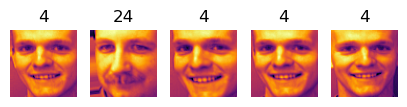

Cluster 7


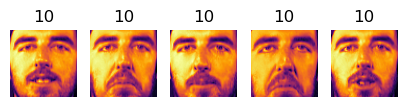

Cluster 8


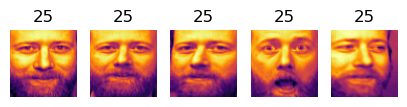

Cluster 9


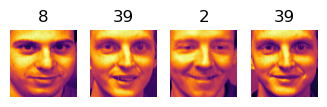

Cluster 10


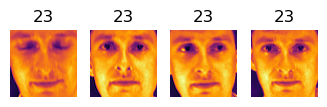

Cluster 11


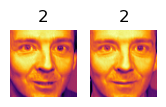

Cluster 12


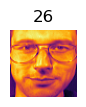

Cluster 13


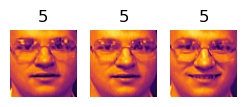

Cluster 14


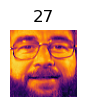

Cluster 15


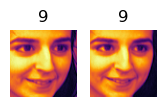

Cluster 16


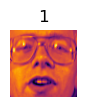

Cluster 17


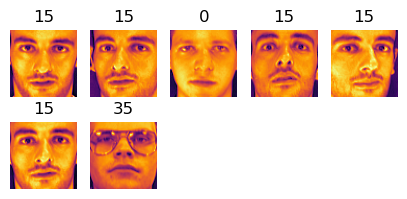

Cluster 18


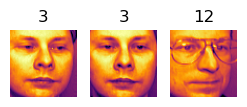

Cluster 19


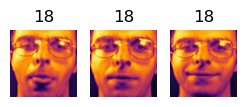

Cluster 20


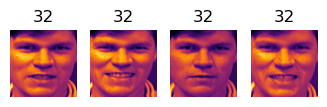

Cluster 21


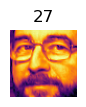

Cluster 22


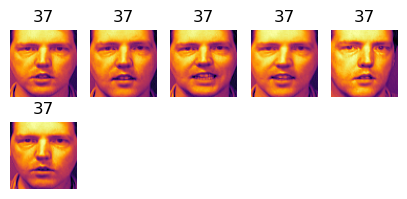

Cluster 23


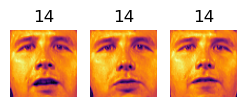

Cluster 24


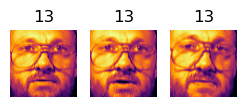

Cluster 25


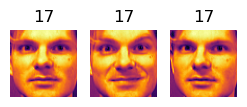

Cluster 26


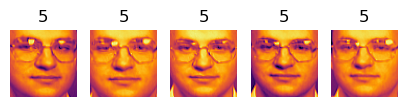

Cluster 27


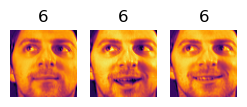

Cluster 28


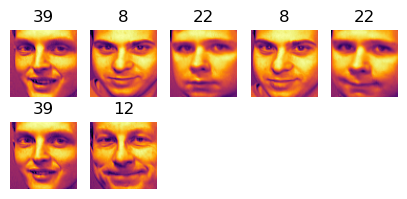

Cluster 29


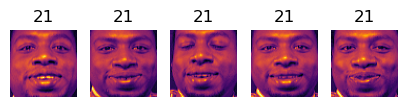

Cluster 30


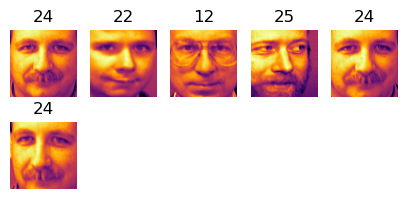

Cluster 31


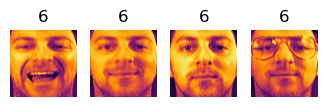

Cluster 32


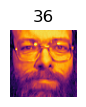

Cluster 33


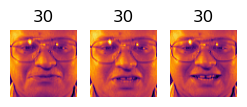

Cluster 34


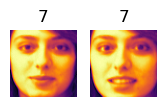

Cluster 35


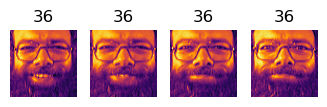

Cluster 36


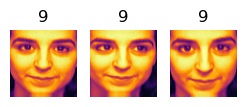

Cluster 37


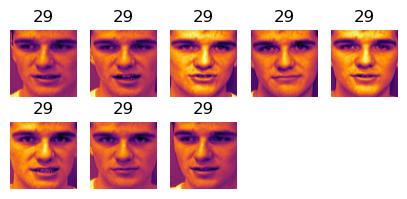

Cluster 38


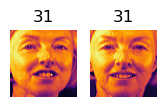

Cluster 39


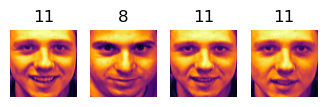

Cluster 40


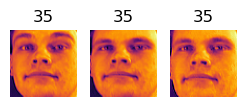

Cluster 41


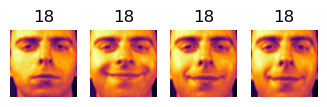

Cluster 42


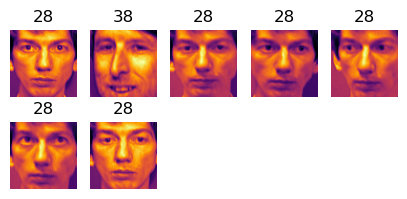

Cluster 43


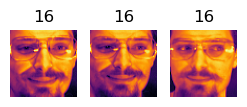

Cluster 44


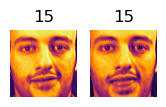

Cluster 45


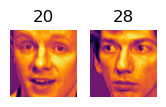

Cluster 46


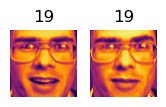

Cluster 47


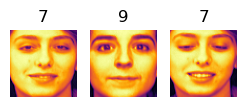

Cluster 48


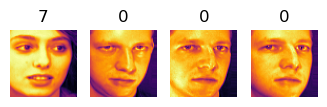

Cluster 49


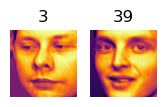

Cluster 50


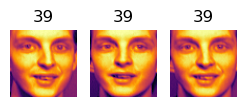

Cluster 51


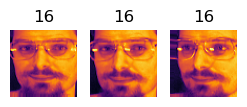

Cluster 52


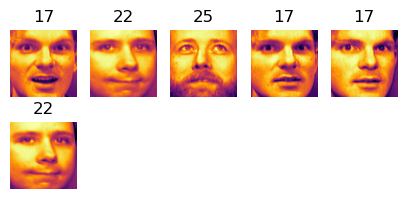

Cluster 53


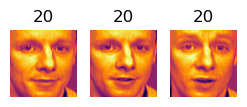

Cluster 54


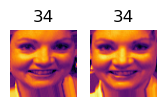

Cluster 55


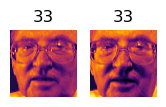

Cluster 56


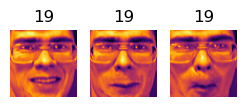

Cluster 57


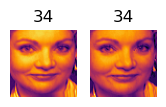

Cluster 58


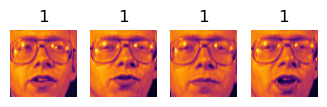

Cluster 59


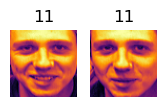

Cluster 60


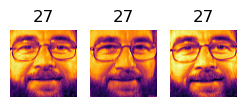

Cluster 61


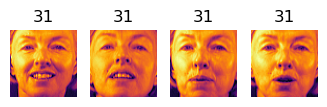

Cluster 62


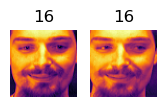

Cluster 63


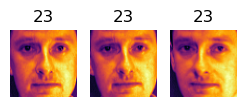

Cluster 64


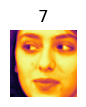

Cluster 65


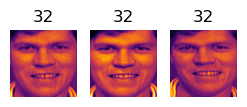

Cluster 66


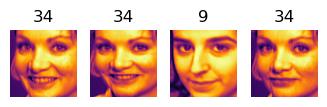

Cluster 67


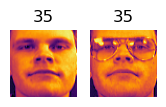

Cluster 68


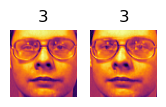

Cluster 69


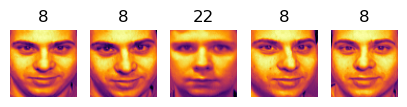

Cluster 70


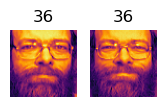

Cluster 71


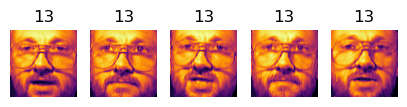

Cluster 72


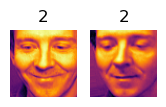

Cluster 73


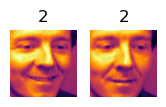

Cluster 74


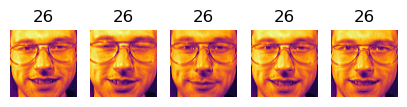

Cluster 75


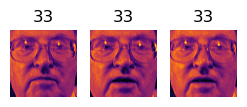

Cluster 76


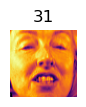

Cluster 77


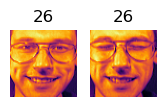

Cluster 78


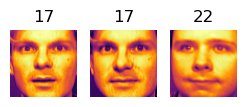

Cluster 79


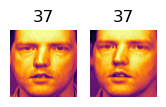

Cluster 80


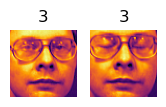

Cluster 81


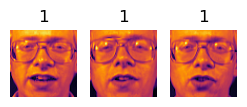

Cluster 82


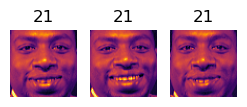

Cluster 83


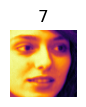

Cluster 84


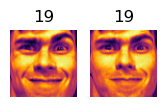

Cluster 85


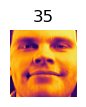

Cluster 86


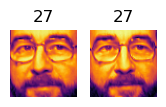

Cluster 87


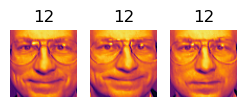

Cluster 88


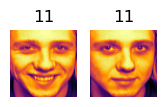

Cluster 89


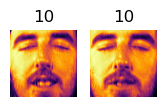

Cluster 90


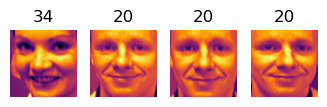

Cluster 91


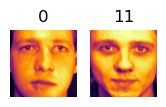

Cluster 92


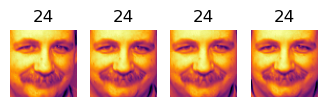

Cluster 93


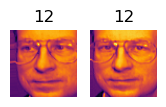

Cluster 94


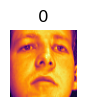

Cluster 95


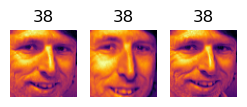

Cluster 96


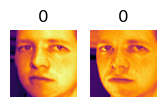

Cluster 97


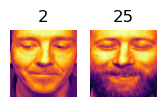

Cluster 98


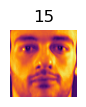

Cluster 99


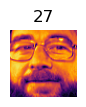

Cluster 100


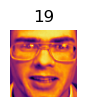

Cluster 101


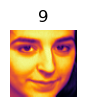

Cluster 102


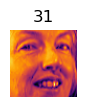

In [10]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="inferno")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_num in np.unique(best_model.labels_):
    print("Cluster", cluster_num)
    in_cluster = best_model.labels_ == cluster_num
    faces = x_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(x_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [12]:
forest_clf.score(x_valid_pca, y_valid)

0.9259259259259259

In [13]:
x_train_red = best_model.transform(x_train_pca)
x_valid_red = best_model.transform(x_valid_pca)
x_test_red = best_model.transform(x_test_pca)

forest_clf.fit(x_train_red, y_train)

forest_clf.score(x_valid_red, y_valid)

0.8148148148148148

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

for clusters in range(1, 200):
    pipeline = make_pipeline(KMeans(n_clusters = clusters, random_state = 42), 
                            RandomForestClassifier(n_estimators = 150, random_state = 42))
    pipeline.fit(x_train_pca, y_train)
    if clusters % 10 == 0:
        print(clusters, pipeline.score(x_valid_pca, y_valid))

10 0.6666666666666666
20 0.6481481481481481
30 0.7962962962962963
40 0.7962962962962963
50 0.8148148148148148
60 0.8518518518518519
70 0.8148148148148148
80 0.8333333333333334
90 0.8703703703703703
100 0.8518518518518519
110 0.8333333333333334
120 0.8333333333333334
130 0.8333333333333334
140 0.8148148148148148
150 0.8703703703703703
160 0.8333333333333334
170 0.8518518518518519
180 0.8333333333333334
190 0.8518518518518519


In [15]:
better_model = KMeans(n_clusters = 90, random_state = 42)
x_train_red = better_model.fit_transform(x_train_pca)
x_valid_red = better_model.transform(x_valid_pca)
x_test_red = better_model.transform(x_test_pca)

x_train_full = np.c_[x_train_pca, x_train_red]
x_valid_full = np.c_[x_valid_pca, x_valid_red]
x_test_full = np.c_[x_test_pca, x_test_red]

In [16]:
forest_clf.fit(x_train_full, y_train)
forest_clf.score(x_valid_full, y_valid)

0.8888888888888888

In [17]:
from sklearn.mixture import GaussianMixture

gaussian_k = [GaussianMixture(n_components = k, random_state = 42, n_init = 10).fit(x_train_pca) for k in range(1, 200)]
bics = [model.bic(x_train_pca) for model in gaussian_k]
aics = [model.aic(x_train_pca) for model in gaussian_k]

(1.0, 200.0, -141777.25771369704, 2038052.1071567538)

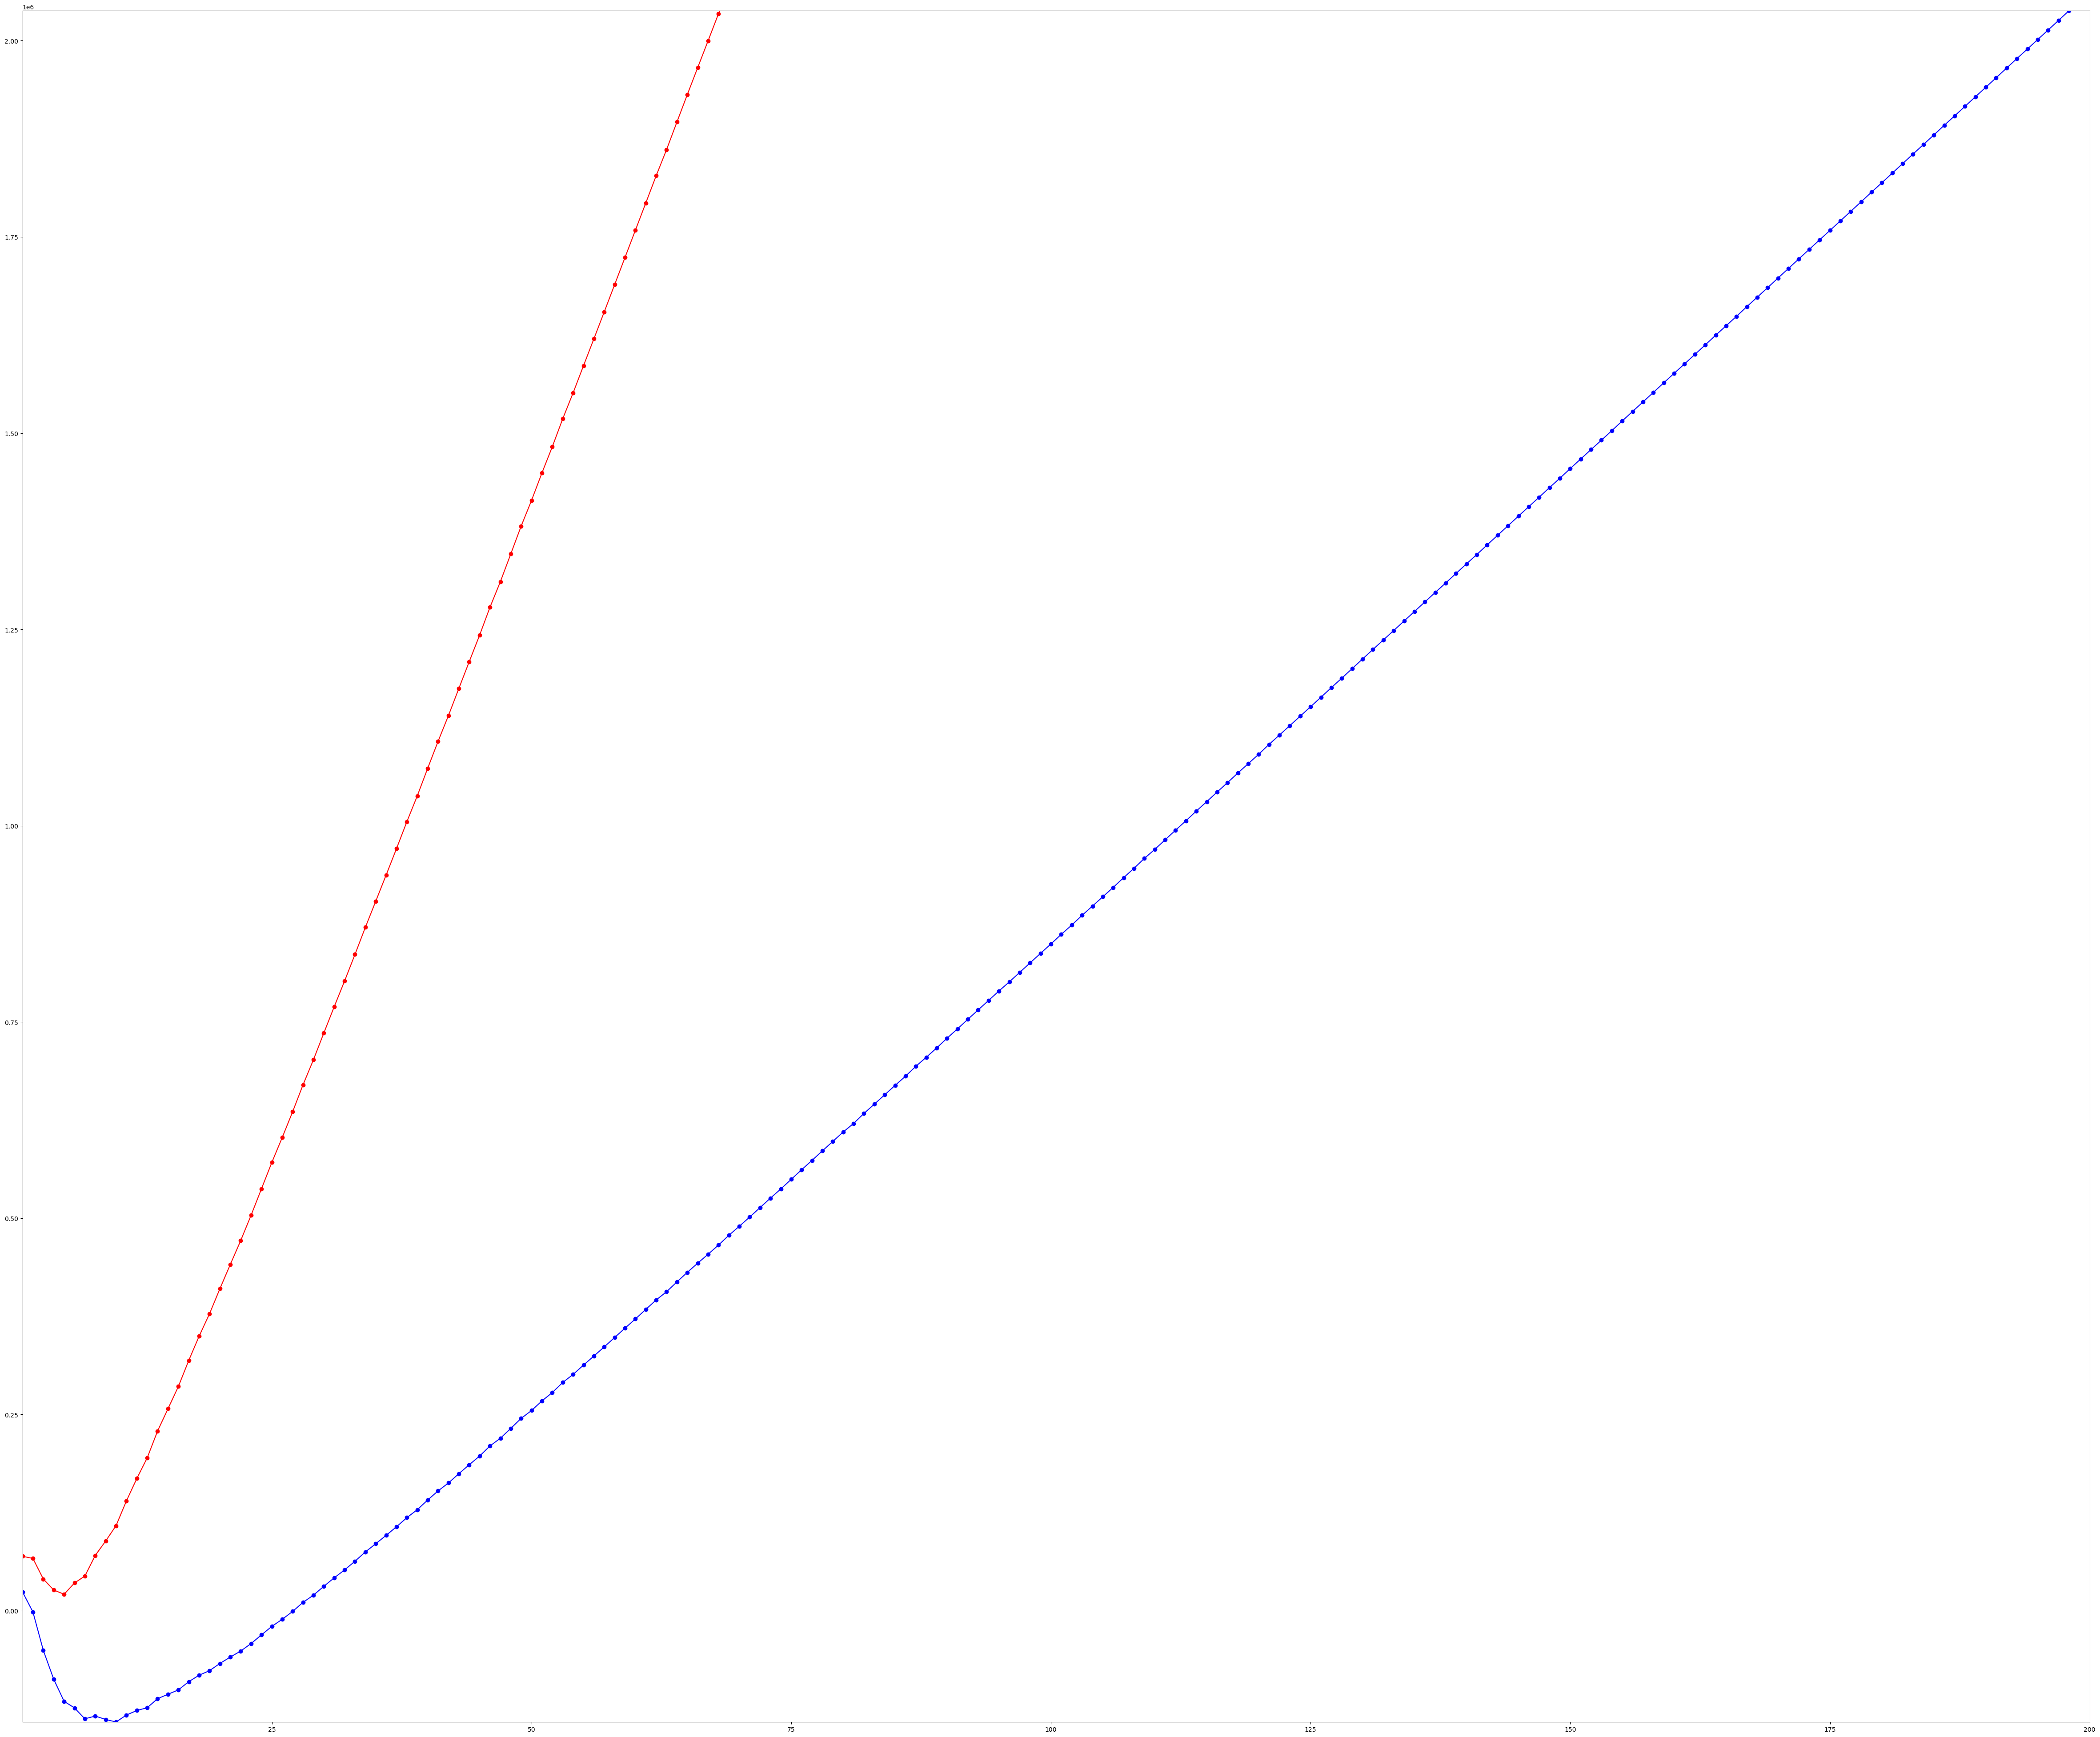

In [18]:
plt.figure(figsize = (60, 50))
plt.plot(aics, "bo-")
plt.plot(bics, "ro-")
plt.axis([1, 200, min(aics) - 50, max(aics) + 50])

In [19]:
np.argmin(aics)

10

In [20]:
gm = GaussianMixture(n_components = 10, random_state = 42, n_init = 10)

gm.fit(x_train_pca)

GaussianMixture(n_components=10, n_init=10, random_state=42)

In [21]:
faces_red, y_faces = gm.sample(20)
y_pred = gm.fit_predict(x_train_pca)

In [22]:
faces = pca.inverse_transform(faces_red)

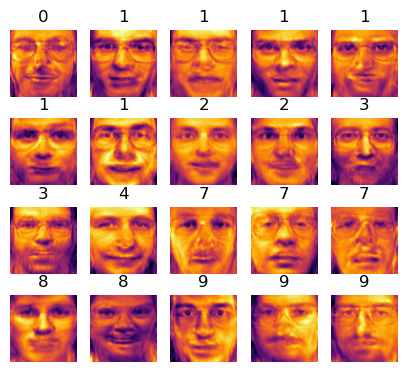

In [23]:
plot_faces(faces, y_faces)

In [24]:
tampered_x = np.transpose(x_train[:10].reshape(-1, 64, 64), axes = [0, 2, 1]).reshape(-1, 4096)
tampered_y = y_train[:10]

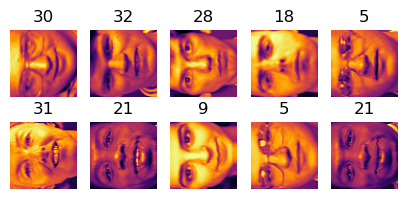

In [25]:
plot_faces(tampered_x, tampered_y)

In [26]:
gm.score_samples(pca.transform(tampered_x))

array([ -9828455.43300912, -15036975.56814572, -15616422.18478707,
       -17176974.40886239,  -7975334.30959585, -12105977.85718383,
        -9173168.65748719, -21479263.84961896, -13378042.05215714,
       -11399956.64248804])